In [ ]:
# function list collector

# def document_class(cls):
#   print(f"Class: {cls.__name__}")

#   for name, func in inspect.getmembers(cls, inspect.isfunction):
#     print(f"- {name}()")

# # Example
# document_class(KittiDataset)


In [1]:
import os
import random
from matplotlib import pyplot as plt

from data.kitti_dataset import KittiDataset
#from data.crop_aug import save_cropped_boxes,load_cropped_boxes,vis_cropped_boxes

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# <center> KITTIDATASET CLASS </center>

The following displays how the dataset is initialized and datapoints are visualized

In [2]:
kitti = KittiDataset() # initialize data object

Loaded 2305 Pedestrian for augmentation
Loaded 5970 Car for augmentation
Loaded 654 Cyclist for augmentation


In [3]:
print(kitti) # summary of dataset

Dataset Summary:
* Paths{
	image_dir=c:\Users\prfej\OneDrive\Education\BHT - Apllied Mathematics\THESIS\Adaptive-Point-HGNN\data\kitti\training\image_2
	point_dir=c:\Users\prfej\OneDrive\Education\BHT - Apllied Mathematics\THESIS\Adaptive-Point-HGNN\data\kitti\training\velodyne
	calib_dir=c:\Users\prfej\OneDrive\Education\BHT - Apllied Mathematics\THESIS\Adaptive-Point-HGNN\data\kitti\training\calib
	label_dir=c:\Users\prfej\OneDrive\Education\BHT - Apllied Mathematics\THESIS\Adaptive-Point-HGNN\data\kitti\training\label_2
}

* Total number of sampels: 7481 {
	* Pedestrians {
		# objects= 2310;
		mh= 1.18 1.76 2.01;
		mw= 0.3 0.66 1.06;
		ml= 0.2 0.92 1.35;
		mx= -18.4 -0.25 19.1;
		my= 0.44 1.47 2.4;
		mz= 4.98 12.57 33.79;
		mA= -0.69 -0.02 0.69;
		mY= -3.14 0.03 3.14;
		image_height:= 370 376;
		image_width: 1224 1242;
	}
	* Miscs {
		# objects= 255;
		mh= 0.76 1.65 3.91;
		mw= 0.4 1.32 2.68;
		ml= 1.01 2.37 12.6;
		mx= -25.5 -3.78 19.81;
		my= 0.75 1.59 2.58;
		mz= 5.47 18.6 53.88;

7298
#(points)=(16823, 3)


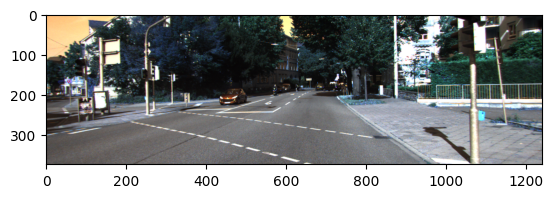

In [4]:
# visualisation/ transformations check
idx = random.choice(range(kitti.num_files))

# while not any([_['name'] =='Truck' for _ in kitti.get_label(idx)]):
#   idx = random.choice(range(kitti.num_files))
  
print(idx)
plt.imshow(kitti.get_image(idx))
kitti.inspect_points(frame_idx=idx,downsample_voxel_size=0.05)

In [5]:
# creates and load json file conatining cropped boxes
# kitti.save_cropped_boxes()
cropped_labels,cropped_cam_points = kitti.load_cropped_boxes()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000267E18CCDF0>>
Traceback (most recent call last):
  File "c:\Users\prfej\miniconda3\envs\gnn.test\lib\site-packages\ipykernel\ipkernel.py", line 788, in _clean_thread_parent_frames
    if phase != "start":
KeyboardInterrupt: 


Loaded 2305 Pedestrian for augmentation
Loaded 5970 Car for augmentation
Loaded 654 Cyclist for augmentation


In [6]:
# visualizes isolated objects
kitti.vis_cropped_boxes(cropped_labels,cropped_cam_points,object_class='Pedestrian')

Pedestrian
Pedestrian
Pedestrian
Pedestrian
Pedestrian
Pedestrian
Pedestrian
Pedestrian
Pedestrian
Pedestrian
Pedestrian


KeyboardInterrupt: 

In [7]:
kitti.vis_crop_aug_sampler()

c:\Users\prfej\OneDrive\Education\BHT - Apllied Mathematics\THESIS\Adaptive-Point-HGNN\data\preprocess.py:327: UserWarning: Warning: fail to augment by rotation
  warnings.warn('Warning: fail to augment by rotation', UserWarning)


KeyboardInterrupt: 

In [ ]:
calib = kitti.get_calib(0)

In [ ]:
calib['cam_to_image']